In [286]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(16.0, 12.0))


In [287]:
path = '/Users/samuelki/Desktop/lsa-ast361/Work/samuelki/lab5/AA+/'
biases = []
for i in range(1,11): 
     biases.append(fits.getdata(path+'nov_7Bias'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
avg_bias = np.asarray(biases).mean(axis=0)


In [288]:
#In the cells below we calibrate our Solar, Neon, and Helium data by taking account for biases by using 
#the background frames and biases. 

In [289]:
neon_on = []
helium_on = []
lamp_off = []

sun_on  = []
sun_off = []


for i in range(11,14):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(path+'3_sec'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(14,17):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(path+'60_sec'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(17,20):
    zeros = (8-len(str(i)))*'0'
    helium_on.append(fits.getdata(path+'HE'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(20,23):
    zeros = (8-len(str(i)))*'0'
    neon_on.append(fits.getdata(path+'NE'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(23,26):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'SUN'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))


In [290]:
helium_on_sub_bias = [helium - avg_bias for helium in helium_on] 
neon_on_sub_bias = [neon - avg_bias for neon in neon_on] 
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]


avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0) 
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)


In [291]:
helium_corrected = [helium_on - avg_lamp_off for helium_on in helium_on_sub_bias]
neon_corrected = [neon_on - avg_lamp_off for neon_on in neon_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avgHE_lamp = np.asarray(helium_corrected).mean(axis=0)
avgNE_lamp = np.asarray(neon_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)


In [292]:
#The cell below shows the images for our adjusted Helium, Neon, and Sun data 

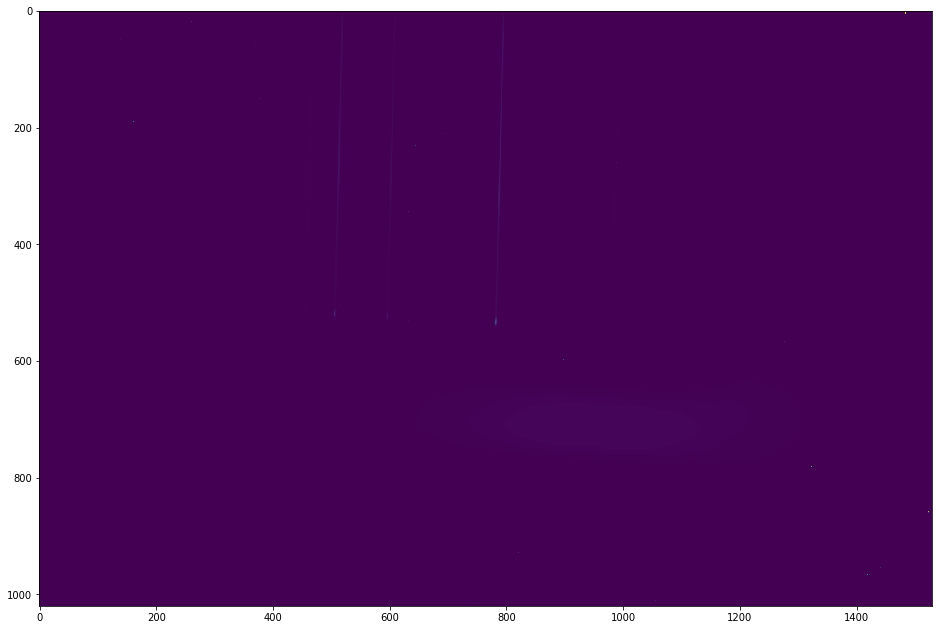

In [308]:
plt.imshow(avgHE_lamp) 
plt.show()

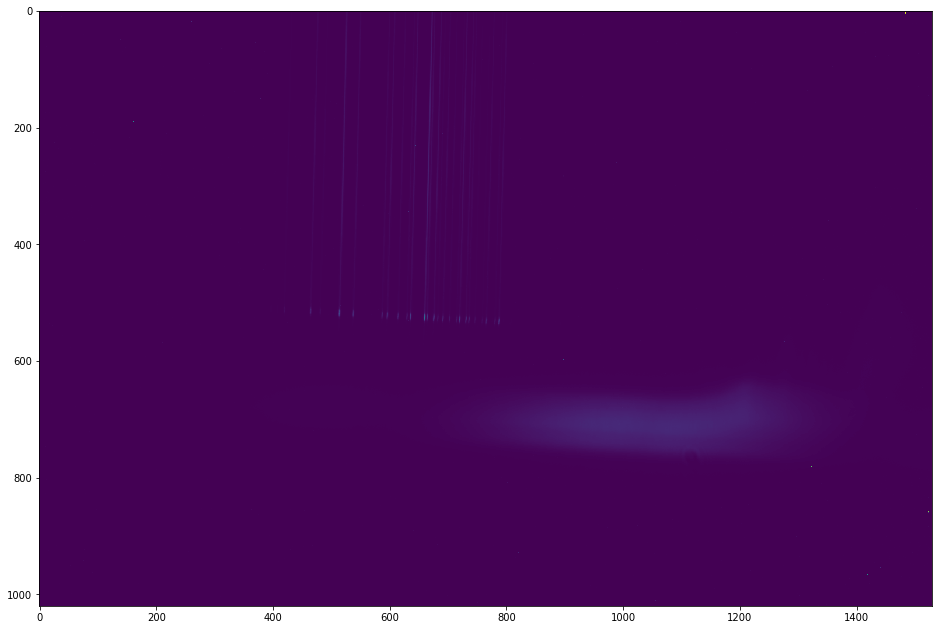

In [309]:
plt.imshow(avgNE_lamp)
plt.show()

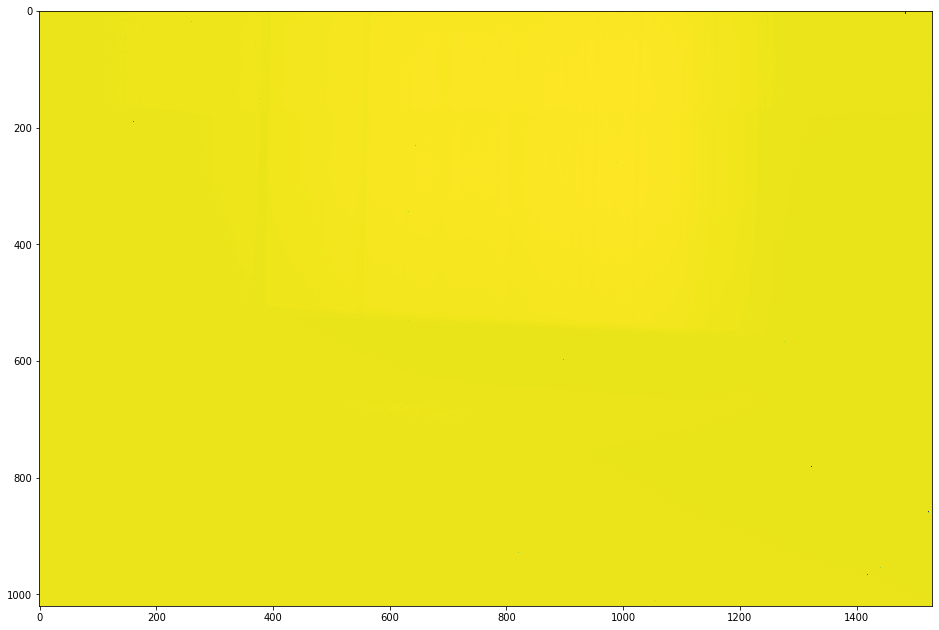

In [310]:
plt.imshow(avg_sun)
plt.show()

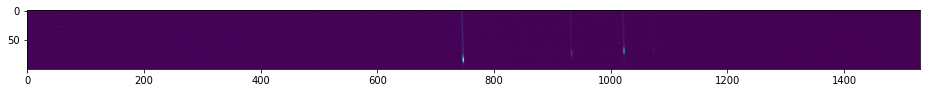

In [294]:
avgHE_adjusted = avgHE_lamp[450:550, :]
avgHE_reverse = avgHE_adjusted[:,::-1]
plt.imshow(avgHE_reverse)
plt.show()

#Our helium spectrum scaled down to mirror taking a "slit" of an image 

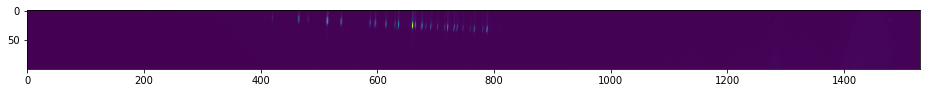

In [295]:
avgNE_adjusted = avgNE_lamp[500:600, :]
plt.imshow(avgNE_adjusted)
plt.show()
#Our neon spectrum scaled down to mirror taking a "slit" of an image 

<function matplotlib.pyplot.show(*args, **kw)>

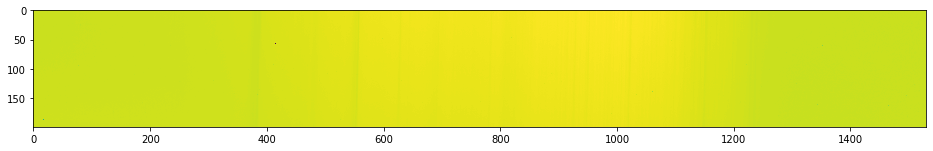

In [296]:
avgsun_adjusted = avg_sun[300:500, :]
plt.imshow(avgsun_adjusted)
plt.show

In [297]:
#The cell below shows the Helium emission lines not shifted or scaled to angstroms but with 
#the proper estimates in wavelength/pixel 

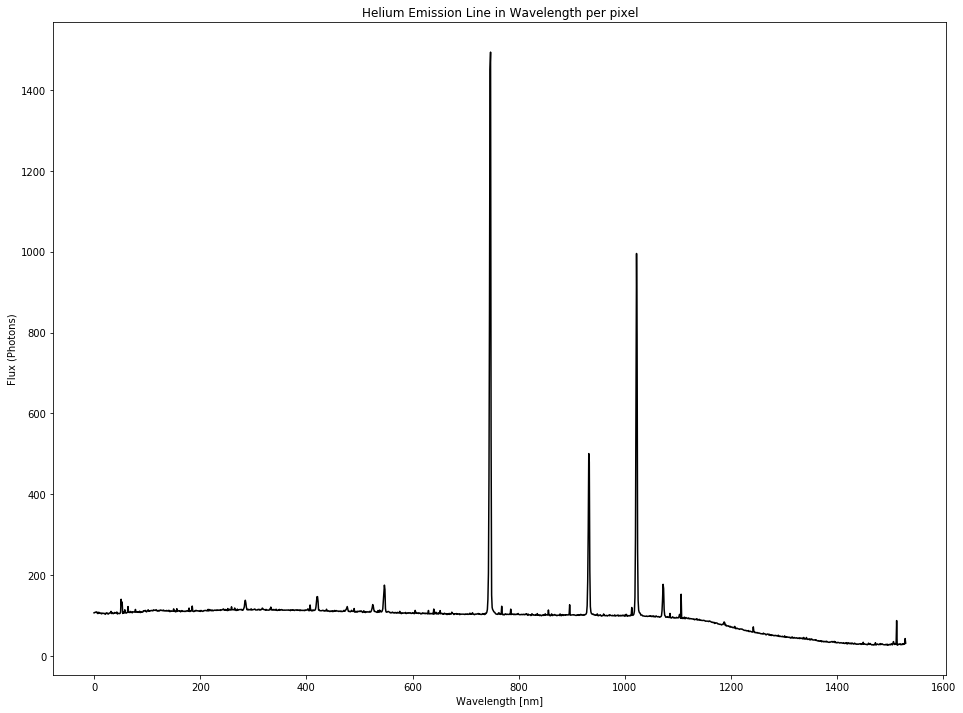

In [314]:
HE_good = np.asarray(avgHE_lamp[450:550,:]).mean(axis=0)
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

    
#x = np.flip(np.arange(len(HE_good)),0)

 #These are for example purposes, not actual wavelengths for the lamp

plt.plot(np.flip(np.arange(len(HE_good))), HE_good, 'k-') #Not reveresed to estimate
plt.title('Helium Emission Line in Wavelength per pixel')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (Photons)')
plt.show()

In [299]:
wavelength = []
photon_count = []
        
for i in range((len(HE_good))): 
    if HE_good[i] > 400: 
        wavelength.append(i)
        photon_count.append((HE_good[i]))
        
print(wavelength)
print(photon_count)


[506, 507, 508, 596, 597, 781, 782, 783, 784, 785]
[795.16, 995.6133333333336, 609.5833333333333, 480.0666666666665, 500.88000000000005, 544.1166666666668, 1493.5033333333338, 1450.733333333333, 848.6333333333334, 437.0133333333332]


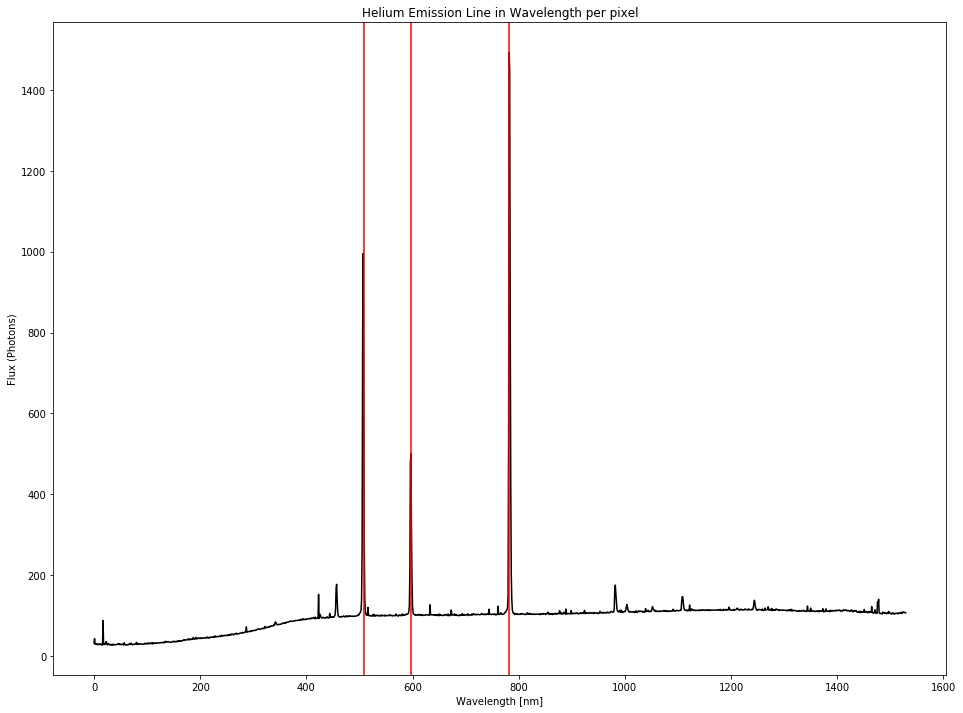

In [316]:
HE_good = np.asarray(avgHE_lamp[450:550,:]).mean(axis=0)
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

    
#x = np.flip(np.arange(len(HE_good)),0)

HE_lines = [782, 508, 597] #These are for example purposes, not actual wavelengths for the lamp

plt.plot(np.arange(len(HE_good)), HE_good, 'k-') 
for line in HE_lines:
    plt.axvline(line,color='r')#Not reveresed to estimate
plt.title('Helium Emission Line in Wavelength per pixel')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (Photons)')
plt.show()

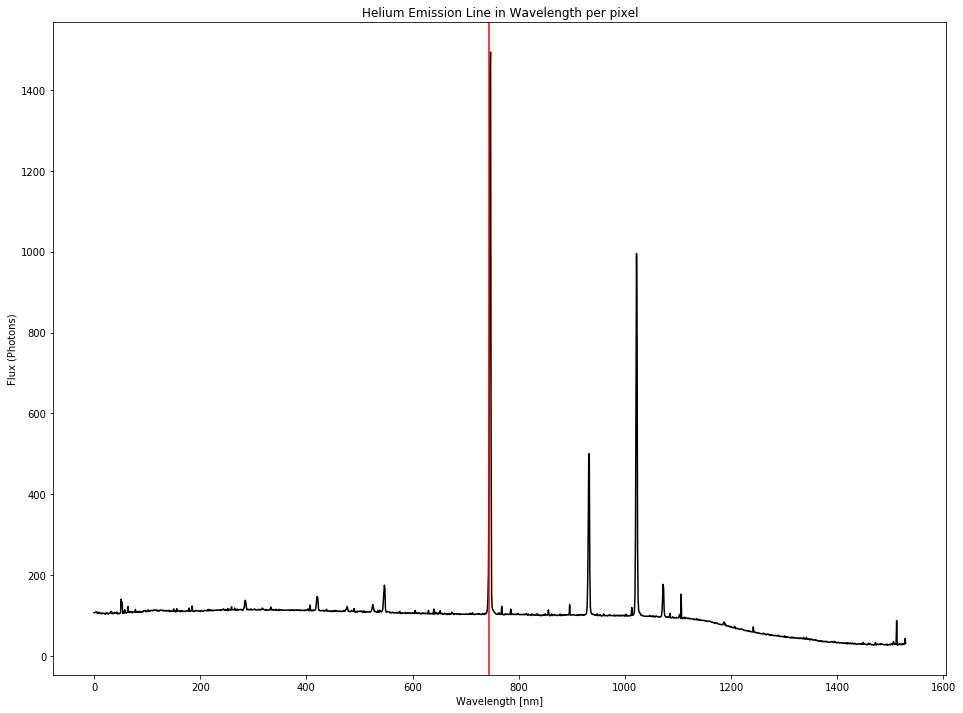

In [318]:
HE_good = np.asarray(avgHE_lamp[450:550,:]).mean(axis=0)
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

    

HE_lines = [745]#Estimates for our peak wavelengths

plt.plot(np.flip(np.arange(len(HE_good))), HE_good, 'k-') #Accounted for the flip
for line in HE_lines:
    plt.axvline(line,color='r')
plt.title('Helium Emission Line in Wavelength per pixel')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (Photons)')
plt.show()

In [300]:
#The cell below shows our Helium Emission spectrum with the proper fit in Angstroms/pixel as well as shift to place the emission lines on the proper places

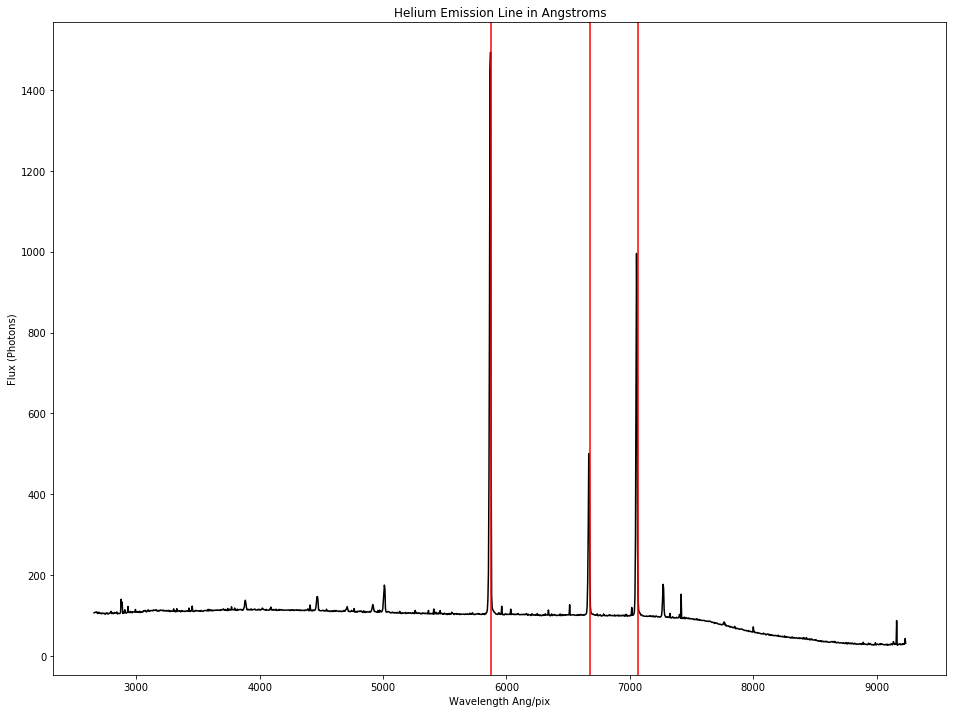

In [322]:
HE_good = np.asarray(avgHE_lamp[450:550,:]).mean(axis=0)
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

correction = 4.3 
shift = 618.37 #in pixels 
x = np.flip(np.arange(len(HE_good))+shift,0)*correction #We shift the entire graph by a certain value and multiply it by our correction value 
y = HE_good
HE_lines = [5875, 6678, 7065]#These are for example purposes, not actual wavelengths for the lamp

plt.plot(x, y, 'k-') #np.flip(~~~) reverses the array inside it.
for line in HE_lines:
    plt.axvline(line,color='r')
plt.title('Helium Emission Line in Angstroms')
plt.xlabel('Wavelength Ang/pix')
plt.ylabel('Flux (Photons)')
plt.show()

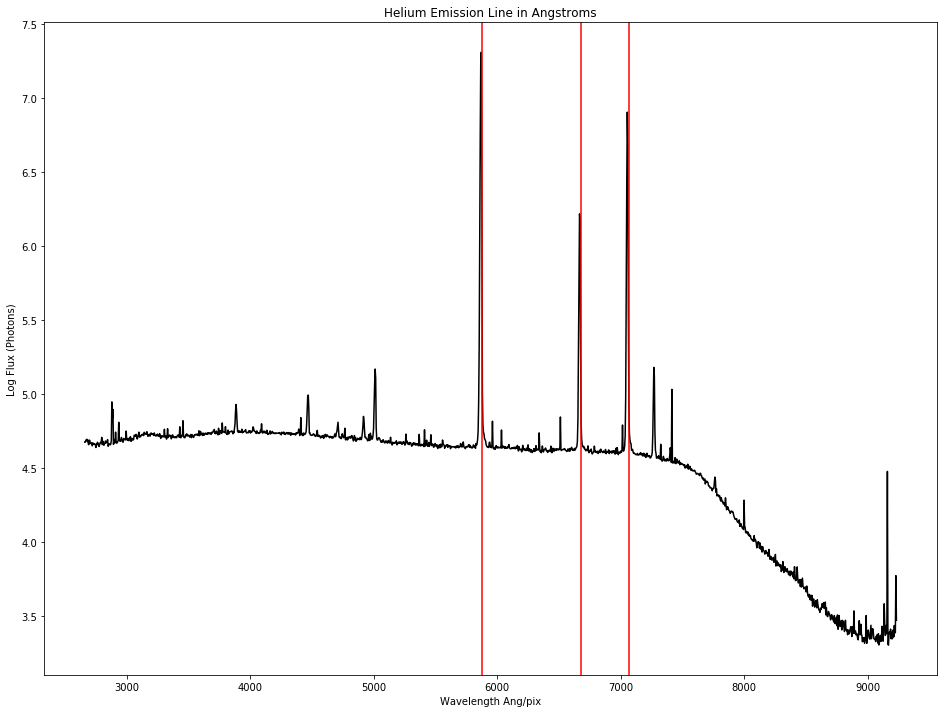

In [301]:
HE_good = np.asarray(avgHE_lamp[450:550,:]).mean(axis=0)
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

correction = 4.3 
shift = 618.37 #in pixels 
x = np.flip(np.arange(len(HE_good))+shift,0)*correction #We shift the entire graph by a certain value and multiply it by our correction value 
y = np.log(HE_good)
HE_lines = [5875, 6678, 7065]#These are for example purposes, not actual wavelengths for the lamp

plt.plot(x, y, 'k-') #np.flip(~~~) reverses the array inside it.
for line in HE_lines:
    plt.axvline(line,color='r')
plt.title('Helium Emission Line in Angstroms')
plt.xlabel('Wavelength Ang/pix')
plt.ylabel('Log Flux (Photons)')
plt.show()

In [302]:
#The cell below contains our Neon lamp data with a number of different fits for wavelengths that display the accuracy of our shift and scale 

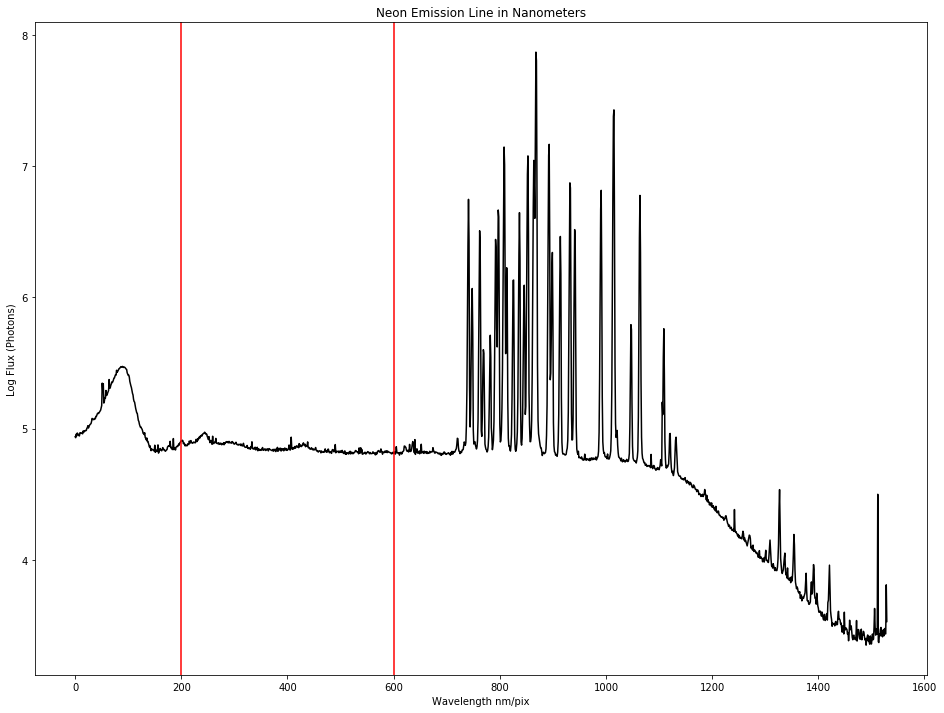

In [303]:
NE_good = np.asarray(avgNE_lamp[450:550,:]).mean(axis=0)


x1 = np.flip(np.arange(len(NE_good)),0) #We shift the entire graph by a certain value and multiply it by our correction value 
y2 = np.log(NE_good)
NE_lines = [200, 600]
plt.plot(x1, y2, 'k-') #np.flip(~~~) reverses the array inside it.
for line in NE_lines:
    plt.axvline(line,color='r')
plt.title('Neon Emission Line in Nanometers')
plt.xlabel('Wavelength nm/pix')
plt.ylabel('Log Flux (Photons)')
plt.show()

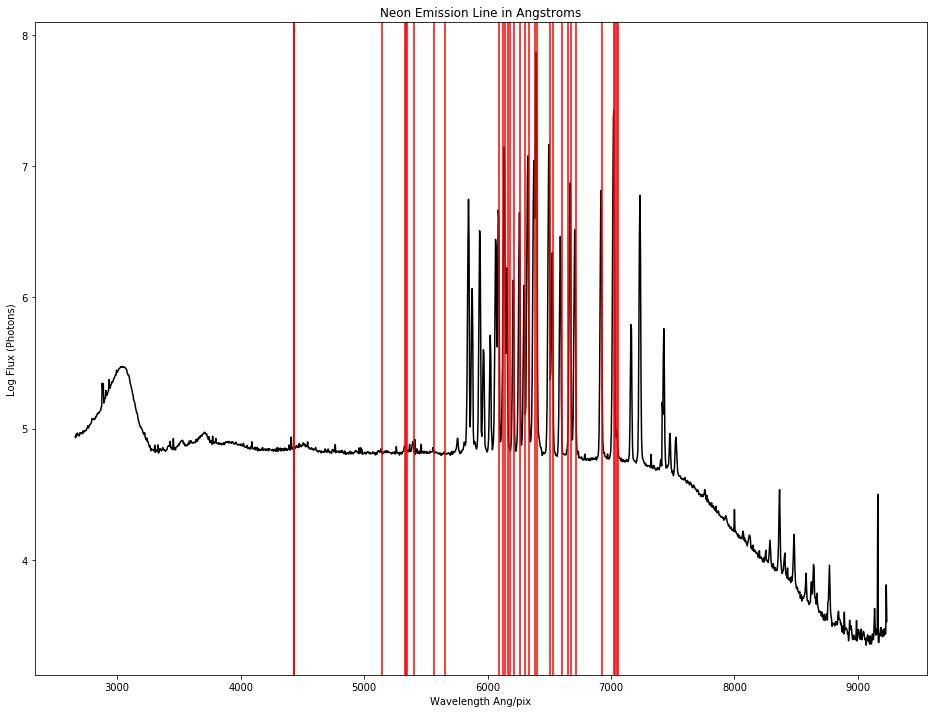

In [304]:
NE_good = np.asarray(avgNE_lamp[450:550,:]).mean(axis=0)


correction = 4.3 
shift = 618.37 #in pixels 
x1 = np.flip(np.arange(len(NE_good))+shift,0)*correction #We shift the entire graph by a certain value and multiply it by our correction value 
y2 = np.log(NE_good)
NE_lines = [4428.63, 4430.90, 4430.94, 5144.94, 5330.78, 5341.09, 5343.28, 5400.56, 5562.77, 5656.66, 6096.16, 6128.45, 6143.06, 6163.59, 6182.15, 6217.28, 6266.50, 6304.79, 6334.43, 6382.99, 6402.25, 6506.53, 6532.88, 6598.95, 6652.09, 6678.28, 6717.04, 6929.47, 7024.05, 7032.41, 7051.29, 7059.11]#These are actual wavelengths for the lamp

plt.plot(x1, y2, 'k-') #np.flip(~~~) reverses the array inside it.
for line in NE_lines:
    plt.axvline(line,color='r')
plt.title('Neon Emission Line in Angstroms')
plt.xlabel('Wavelength Ang/pix')
plt.ylabel('Log Flux (Photons)')
plt.show()

In [305]:
#This below shows the spectrum for our sun with 3 absorption lines found at the dips on the curve

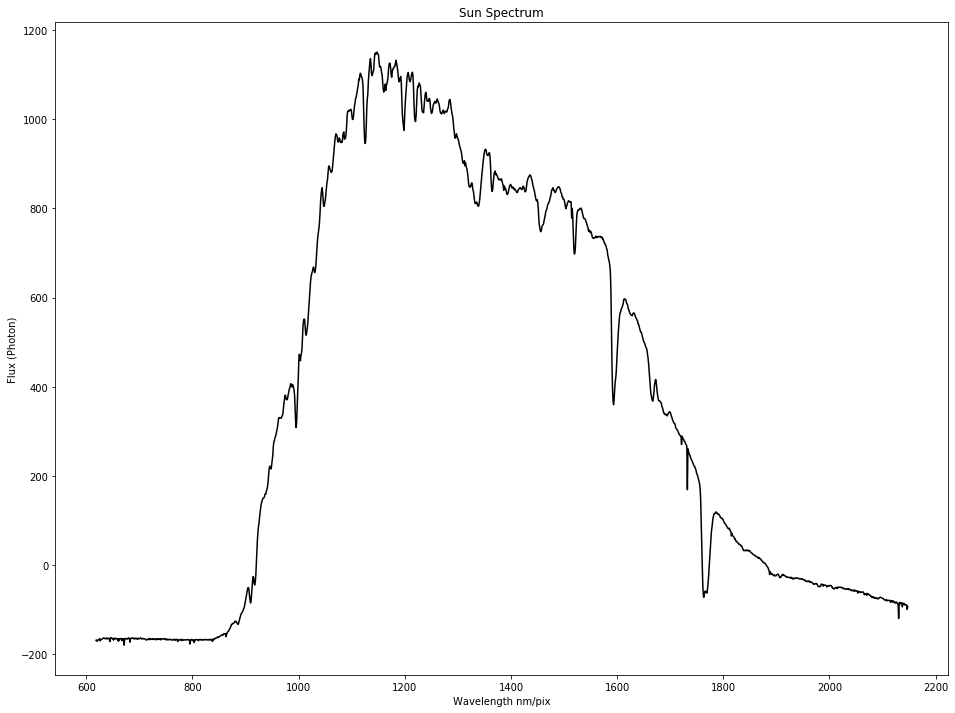

In [323]:
sun_good = np.asarray(avg_sun[300:500,:]).mean(axis=0)

shift = 618.37 #in pixels 
x_sun = np.flip(np.arange(len(sun_good))+shift,0) #We shift the entire graph by a certain value and multiply it by our correction value 
y_sun = sun_good
plt.plot(x_sun, y_sun, 'k-') #np.flip(~~~) reverses the array inside it.
plt.title('Sun Spectrum')
plt.xlabel('Wavelength nm/pix')
plt.ylabel('Flux (Photon)')
plt.show()

/Users/samuelki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


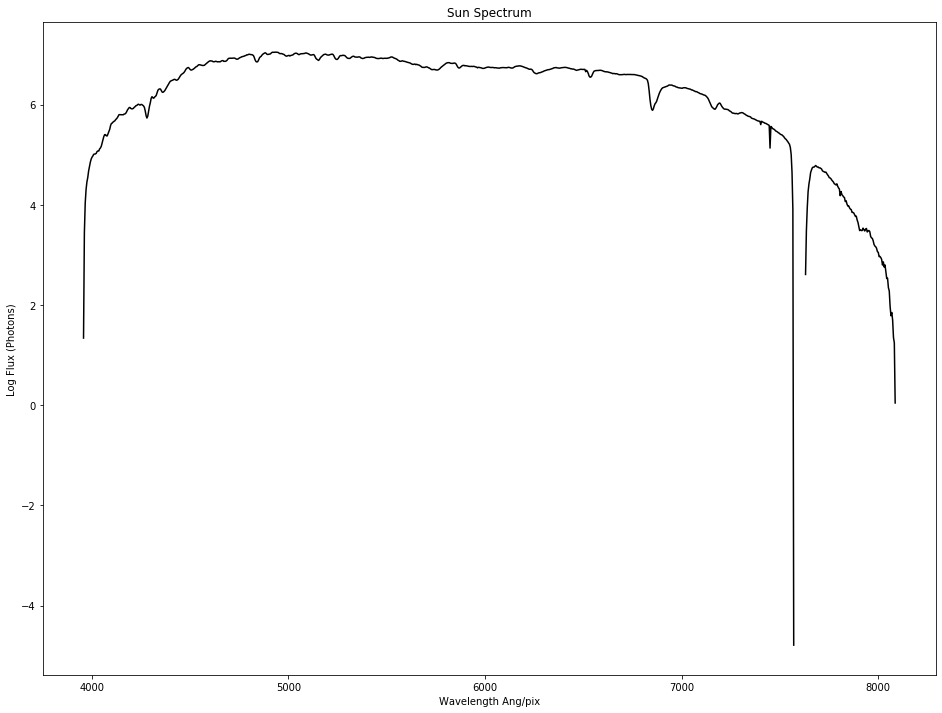

In [324]:
sun_good = np.asarray(avg_sun[300:500,:]).mean(axis=0)

correction = 4.3 
shift = 618.37 #in pixels 
x_sun = np.flip(np.arange(len(sun_good))+shift,0)*correction#We shift the entire graph by a certain value and multiply it by our correction value 
y_sun = np.log(sun_good)


plt.plot(x_sun, y_sun, 'k-') #np.flip(~~~) reverses the array inside it.
plt.title('Sun Spectrum')
plt.xlabel('Wavelength Ang/pix')
plt.ylabel('Log Flux (Photons)')
plt.show()

/Users/samuelki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


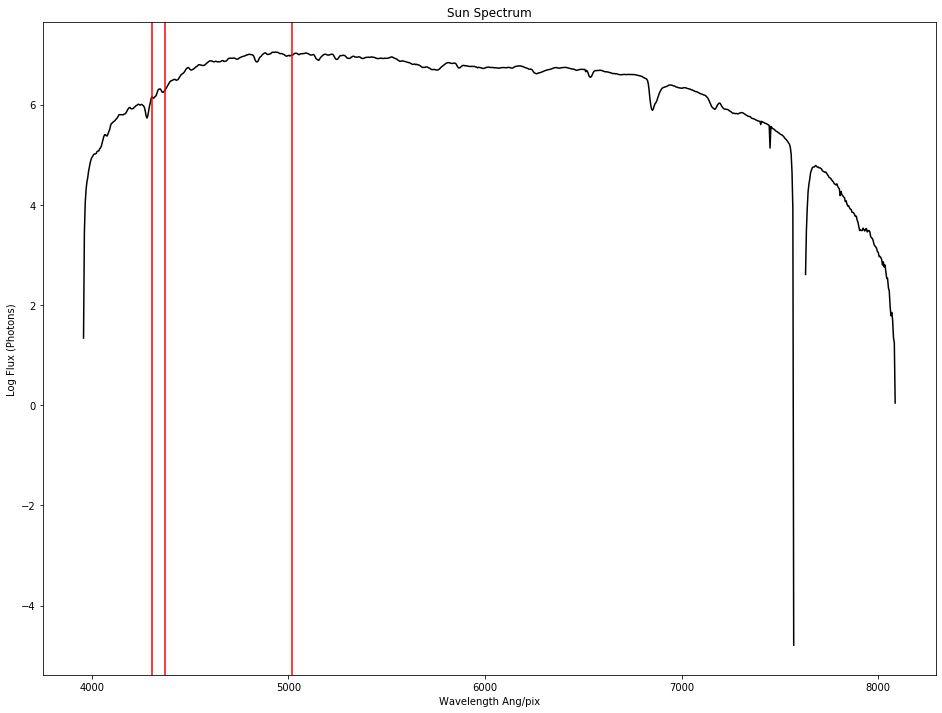

In [319]:
sun_good = np.asarray(avg_sun[300:500,:]).mean(axis=0)

correction = 4.3 
shift = 618.37 #in pixels 
x_sun = np.flip(np.arange(len(sun_good))+shift,0)*correction#We shift the entire graph by a certain value and multiply it by our correction value 
y_sun = np.log(sun_good)
sun_lines = [4308.283, 4372.18, 5016.39]#L line (Fe), H line (Ca+), and e line (Hg)

plt.plot(x_sun, y_sun, 'k-') #np.flip(~~~) reverses the array inside it.
for line in sun_lines:
    plt.axvline(line,color='r')
plt.title('Sun Spectrum')
plt.xlabel('Wavelength Ang/pix')
plt.ylabel('Log Flux (Photons)')
plt.show()